In [1]:
from db.database import Database
from os import path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
from db.models import Post, Topic, Blueprint
from lang_identification import identify_language
import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
db = Database()
topics = db.get_topics()
posts = db.get_posts()
blueprints = db.get_all_blueprints()

Loading blueprints: 100%|██████████| 2232/2232 [00:04<00:00, 544.69it/s]


Processing Blueprints: 100%|██████████| 2232/2232 [01:17<00:00, 28.85it/s]


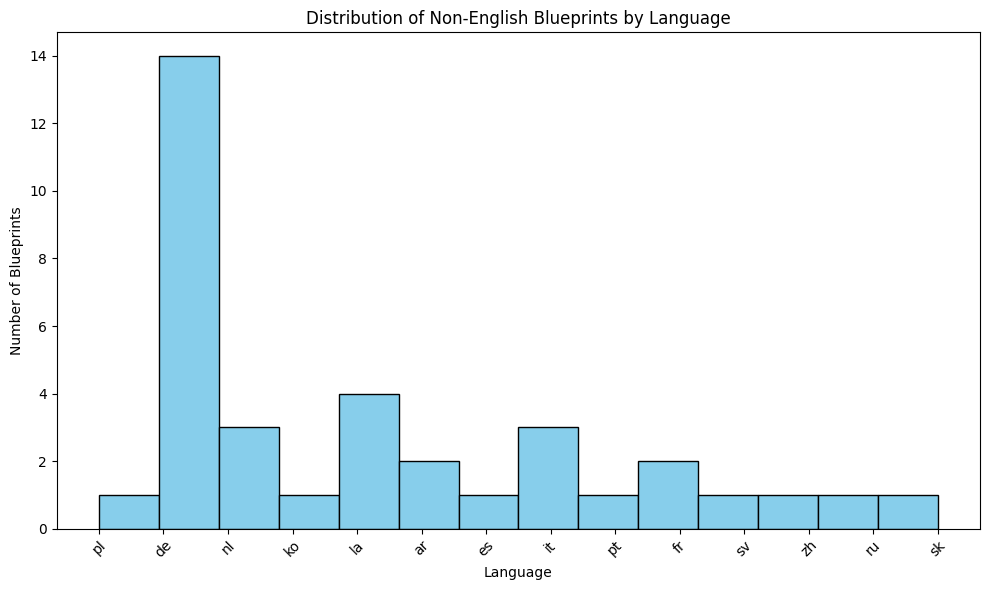

In [3]:

non_english = {} 
for bp in tqdm.tqdm(blueprints, desc="Processing Blueprints"):
    lang = identify_language(bp)
    if lang != 'en':
        non_english[bp] = lang

plt.figure(figsize=(10, 6))
plt.hist(non_english.values(), bins=len(set(non_english.values())), color='skyblue', edgecolor='black')
plt.title('Distribution of Non-English Blueprints by Language')
plt.xlabel('Language')
plt.ylabel('Number of Blueprints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
non_english.keys().__len__()

36

In [5]:
for bp in non_english:
    blueprints.remove(bp)

In [4]:
ex_topic = topics[59]
ex_topic_posts = db.get_posts_by_topic_id(ex_topic.id)
ex_topic_bps = [db.get_blueprints_by_post_id(post.post_id) for post in ex_topic_posts]
ex_topic_bps

[[<db.models.Blueprint at 0x14faf794850>]]

In [5]:
ex_topic.topic_url

'https://community.home-assistant.io//t/mqtt-record-timestamp-of-event/274930'

In [6]:
groups = db.get_blueprints_per_topic()
groups.keys().__len__()

1211

In [14]:
topics.__len__()

1650

In [17]:
posts.__len__()

46060

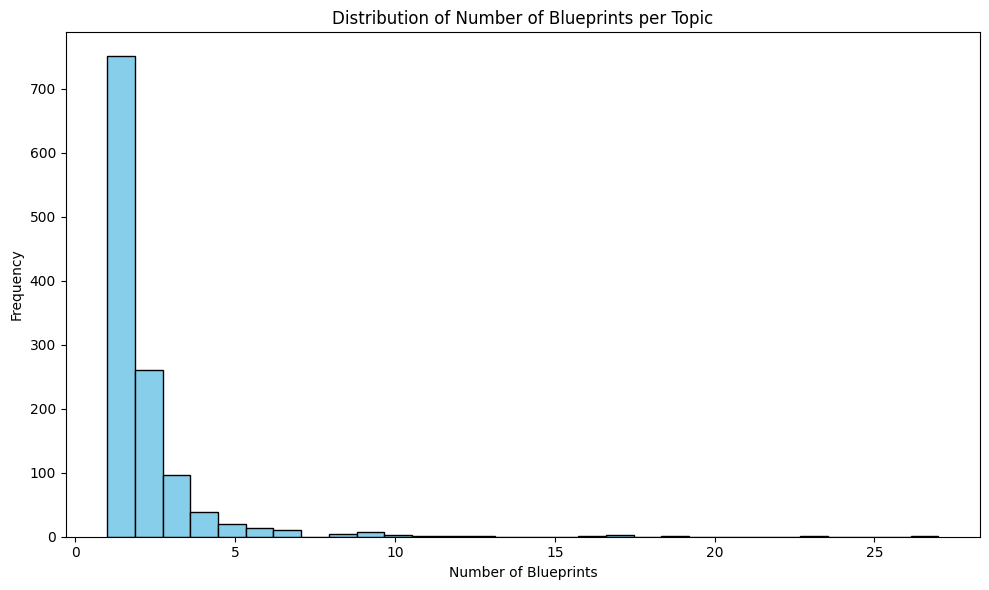

In [7]:
plt.figure(figsize=(10, 6))
plt.hist([len(bps) for bps in groups.values()], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Blueprints per Topic')
plt.xlabel('Number of Blueprints')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [8]:
real_groups = {k: v for k, v in groups.items() if len(v) > 1}
real_groups.values()

dict_values([[<db.models.Blueprint object at 0x0000014FA8B47BD0>, <db.models.Blueprint object at 0x0000014FA17DB610>], [<db.models.Blueprint object at 0x0000014FA8ACFB50>, <db.models.Blueprint object at 0x0000014FA8ACE790>], [<db.models.Blueprint object at 0x0000014FA93DD310>, <db.models.Blueprint object at 0x0000014FA9B4B9D0>, <db.models.Blueprint object at 0x0000014FA9B58190>], [<db.models.Blueprint object at 0x0000014FA9B60A90>, <db.models.Blueprint object at 0x0000014FA9B6A010>], [<db.models.Blueprint object at 0x0000014FA9439D50>, <db.models.Blueprint object at 0x0000014FA943BD90>], [<db.models.Blueprint object at 0x0000014FA93EB910>, <db.models.Blueprint object at 0x0000014FA93C0C10>], [<db.models.Blueprint object at 0x0000014FA9385E90>, <db.models.Blueprint object at 0x0000014FA9364950>], [<db.models.Blueprint object at 0x0000014FA9E39E50>, <db.models.Blueprint object at 0x0000014FA9E09C10>], [<db.models.Blueprint object at 0x0000014FA9D84AD0>, <db.models.Blueprint object at 0x0

In [13]:
len(real_groups.keys())

460

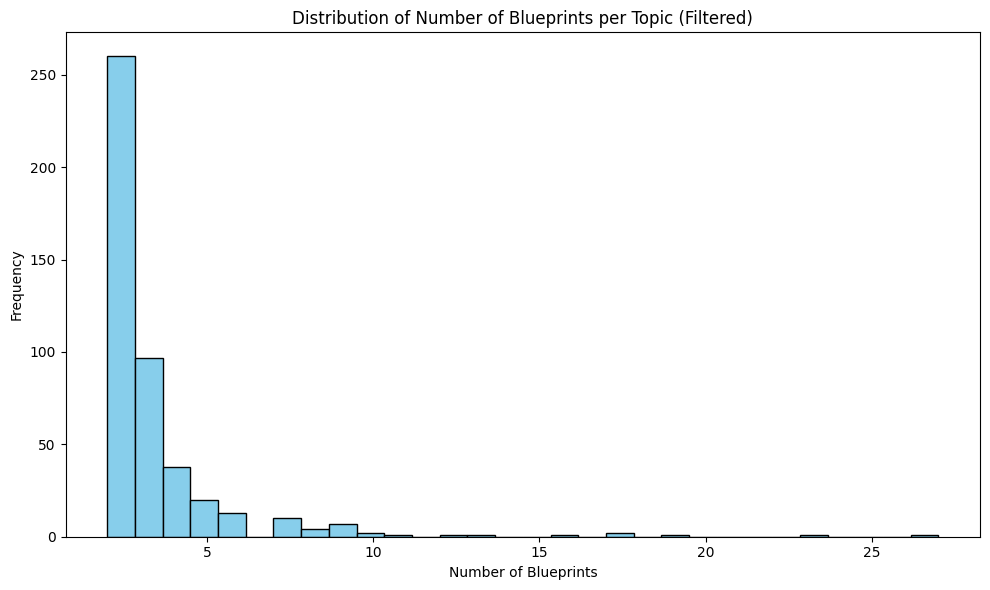

In [15]:
plt.figure(figsize=(10, 6))
plt.hist([len(bps) for bps in real_groups.values()], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Blueprints per Topic (Filtered)')
plt.xlabel('Number of Blueprints')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
posts_dict = {post.post_id: post for post in posts}

In [52]:
scores_dict = {}
for topic_id, bp_group in real_groups.items():
    _scores = []
    for bp in bp_group:
        _scores.append({bp.id: posts_dict[bp.post_id].score})

    scores_dict[topic_id] = _scores
scores_dict

{'256469': [{9: 1518.6}, {10: 1518.6}],
 '257765': [{14: 7730.6}, {15: 7730.6}],
 '259767': [{25: 12215}, {26: 12215}, {27: 12215}],
 '260727': [{28: 2177}, {29: 2177}],
 '253977': [{35: 9714.6}, {36: 195.2}],
 '265505': [{37: 2550.6}, {38: 2550.6}],
 '255908': [{39: 2687.6}, {40: 39.8}],
 '269117': [{43: 6069.6}, {44: 6069.6}],
 '256311': [{46: 5507.6}, {47: 125}, {48: 29.4}, {49: 56}],
 '257141': [{56: 2083.2}, {57: 52}],
 '260744': [{76: 1260.2}, {77: 59.4}],
 '286465': [{78: 482.2}, {79: 12.8}],
 '305624': [{96: 1822.4}, {97: 1822.4}],
 '294217': [{102: 6383}, {103: 6383}],
 '280125': [{106: 14887.8}, {107: 464}, {108: 171.4}],
 '286565': [{112: 1896.6}, {113: 50}],
 '260725': [{115: 2588.4}, {116: 2588.4}],
 '291907': [{118: 188.2}, {119: 188.2}],
 '255773': [{121: 936}, {122: 936}],
 '313571': [{130: 904.2}, {131: 904.2}],
 '340021': [{135: 2494.8}, {136: 2494.8}],
 '287064': [{139: 2744.4}, {140: 2744.4}],
 '258591': [{145: 5569.8}, {146: 5569.8}],
 '255456': [{160: 215.6}, {161

In [59]:
from util.text_manipulation import parse_yaml
bp_9 = db.get_blueprints_by_ids([9])[0]
bp_10 = db.get_blueprints_by_ids([10])[0]
bp_9_yaml = parse_yaml(bp_9.blueprint_code)
bp_10_yaml = parse_yaml(bp_10.blueprint_code)
bp_9_yaml.__eq__(bp_10_yaml)

Loading blueprints: 100%|██████████| 1/1 [00:00<00:00, 64.89it/s]


False

In [35]:
from sqlalchemy import select, exists

session = db.open_session()
stmt = (
        select(Topic)
            .where(
                ~exists(
                    select(Blueprint.id)
                    .join(Post, Post.post_id == Blueprint.post_id)
                    .where(Post.topic_id == Topic.topic_id)
                )
            )
        )

topics_without_bps = session.execute(stmt).scalars().all()
session.close()
len(topics_without_bps)

439

In [51]:
[topic.topic_id for topic in topics_without_bps]

['253788',
 '252306',
 '256921',
 '257562',
 '261020',
 '277147',
 '280033',
 '274860',
 '278134',
 '309110',
 '318170',
 '325253',
 '330758',
 '336607',
 '324371',
 '365371',
 '365055',
 '370833',
 '381256',
 '393295',
 '377368',
 '404354',
 '387158',
 '407861',
 '383003',
 '414082',
 '424042',
 '400558',
 '255991',
 '377162',
 '441687',
 '445957',
 '449028',
 '463014',
 '462370',
 '469102',
 '476005',
 '479429',
 '419700',
 '493728',
 '448687',
 '509326',
 '520596',
 '256094',
 '434455',
 '526393',
 '541332',
 '544467',
 '328336',
 '551808',
 '553494',
 '556986',
 '332723',
 '454124',
 '539831',
 '389866',
 '565046',
 '445904',
 '435154',
 '537449',
 '557515',
 '581566',
 '581859',
 '584456',
 '546635',
 '598277',
 '600544',
 '592956',
 '286445',
 '581769',
 '610881',
 '301052',
 '370840',
 '617818',
 '387608',
 '628101',
 '634286',
 '632520',
 '558854',
 '602059',
 '501125',
 '383118',
 '660758',
 '663816',
 '612859',
 '645432',
 '604008',
 '510947',
 '497848',
 '286443',
 '676340',